Mike Leske  
R00183658

# PART B - Keras – High Level API [30 Marks]

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!unzip "/content/gdrive/My Drive/Colab Notebooks/data-1.zip"
!ls

# (i)

The initial task for part 2 is to use Keras to build a SoftMax classifier. This will serve as a benchmark for the work below. You should be able to achieve an accuracy of approximately 85% on the test data. Specify a batch size of 256 when building your model.

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils import np_utils

import numpy as np
import h5py

import matplotlib.pyplot as plt
plt.style.use("ggplot")

%matplotlib inline

print(tf.__version__)

TensorFlow 2.x selected.
2.2.0-rc1


Using TensorFlow backend.


In [ ]:
def loadData():
    with h5py.File('data.h5','r') as hf:
        print('List of arrays in this file:', hf.keys())
        allTrain = hf.get('trainData')
        allTest = hf.get('testData')
        npTrain = np.array(allTrain)
        npTest = np.array(allTest)
        
        print('Shape of the array dataset_1:', npTrain.shape)
        print('Shape of the array dataset_2:', npTest.shape)
    
    return npTrain[:,:-1], npTrain[:, -1], npTest[:,:-1], npTest[:, -1]

def plot_loss(history, epochs, configuration):
    plt.figure(figsize=(12,8))
    plt.plot(np.arange(0, epochs), history.history["loss"], label="train_loss")
    plt.plot(np.arange(0, epochs), history.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, epochs), history.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, epochs), history.history["val_accuracy"], label="val_acc")
    plt.title("Training Loss and Accuracy - Hidden Layers: {}".format(configuration))
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend()
    plt.show()

def handle_results(results):
    print('\nTest accuracy:', results[1])
    print('Test loss    :', results[0])

    result_data['test_acc'].append(results[1])
    result_data['test_loss'].append(results[0])

    print('')

In [ ]:
'''
The function get_model(...) builds a Sequential TF/Keras model, compiles is
and finally returns it. This function was built in a way to flexibly return
the architecture needed for the tasks of the assignment.

Every model starts with a passthough InputLayer (for specifying the 
input_shape) and end with a 10 units Dense layers for Softmax activation.

Hidden layers can be flexibly created in between based on hidden_layer_sizes
with or without dropout.
'''

def get_model(hidden_layer_sizes=[], dropout=None):
    # Instantiate a Sequential model
    model = tf.keras.models.Sequential()
    # Add an InputLayer to allow for dynamic neural assembly 
    model.add(tf.keras.layers.InputLayer(input_shape=(784,)))

    for size in hidden_layer_sizes:
        # Add a Dense layer per entry in hidden_layer_sizes
        model.add(tf.keras.layers.Dense(units=size, activation='relu'))
        if dropout:
            model.add(tf.keras.layers.Dropout(dropout))
    
    # Add final SoftMax layer
    model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

    # Compile the model
    model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

    # Print the model summary
    model.summary()
    
    result_data['params'].append(model.count_params())
    print('')

    # return compile model
    return model

In [4]:
trainX, trainY, testX, testY = loadData()

#trainY = np_utils.to_categorical(trainY, 10)
#testY = np_utils.to_categorical(testY, 10)

List of arrays in this file: <KeysViewHDF5 ['testData', 'trainData']>
Shape of the array dataset_1: (200000, 785)
Shape of the array dataset_2: (17000, 785)


---

**The following network architectures will be trained and evaluated (according to Assignment outline):**

*   Softmax Layer only
*   L1 200 + Softmax
*   L1 400 + L2 200 + Softmax
*   L1 600 + L2 400 + L3 200 + Softmax
*   L1 800 + L2 600 + L3 400 + L4 200 + Softmax


In [ ]:
# Define common learning parameters

BATCH_SIZE = 256
EPOCHS = 20
VAL_SPLIT = 0.1

result_data = {
    'test_loss': [],
    'test_acc': [],
    'params': []
}

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________

Epoch 1/20
704/704 [==============================] - 2s 3ms/step - loss: 0.7516 - accuracy: 0.8011 - val_loss: 0.6600 - val_accuracy: 0.8240
Epoch 2/20
704/704 [==============================] - 2s 3ms/step - loss: 0.6536 - accuracy: 0.8278 - val_loss: 0.6457 - val_accuracy: 0.8263
Epoch 3/20
704/704 [==============================] - 2s 3ms/step - loss: 0.6411 - accuracy: 0.8305 - val_loss: 0.6391 - val_accuracy: 0.8289
Epoch 4/20
704/704 [==============================] - 2s 3ms/step - loss: 0.6355 - accuracy: 0.8319 - val_loss: 0.6379 - val_accuracy: 0.8302
Epoch 5/20
704/704 [==============================] - 2s 3ms/step - loss: 0.631

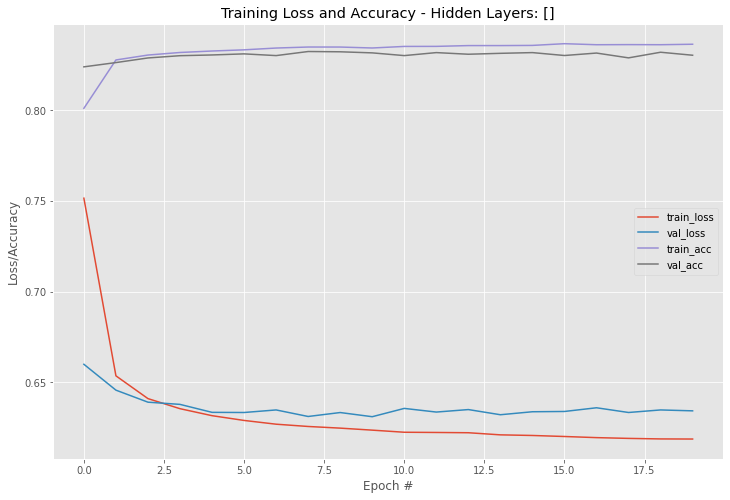

In [6]:
'''
Run the neural netork with a single Softmax layer only
'''

hidden_layer_sizes=[]

model = get_model(hidden_layer_sizes=hidden_layer_sizes)
history = model.fit(trainX, trainY, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=VAL_SPLIT)
results = model.evaluate(testX, testY)

handle_results(results)
plot_loss(history, EPOCHS, hidden_layer_sizes)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2010      
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________

Epoch 1/20
704/704 [==============================] - 2s 3ms/step - loss: 0.5271 - accuracy: 0.8477 - val_loss: 0.4470 - val_accuracy: 0.8701
Epoch 2/20
704/704 [==============================] - 2s 3ms/step - loss: 0.4086 - accuracy: 0.8813 - val_loss: 0.4100 - val_accuracy: 0.8817
Epoch 3/20
704/704 [==============================] - 2s 3ms/step - loss: 0.3679 - accuracy: 0.8926 - val_loss: 0.3912 - val_accuracy: 0.8874
Epoch 4/20
704/704 [==============================] - 2s 3ms/step - loss: 0.3417 - 

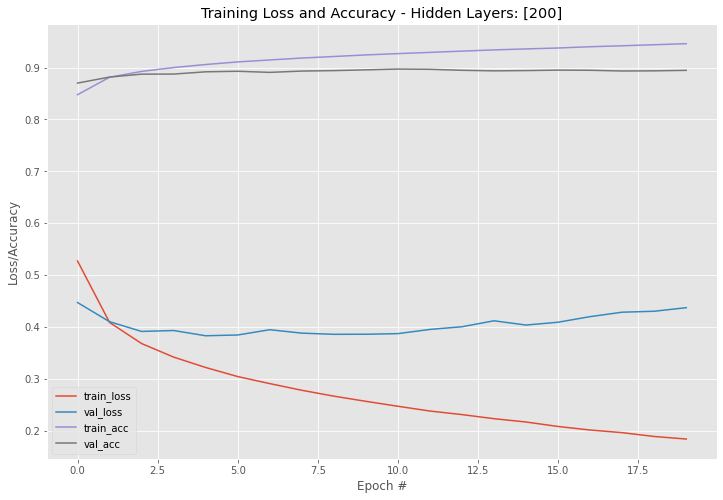

In [7]:
'''
Run the neural netork with one Dense layer followed by a Softmax layer
'''

hidden_layer_sizes=[200]

model = get_model(hidden_layer_sizes=hidden_layer_sizes)
history = model.fit(trainX, trainY, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=VAL_SPLIT)
results = model.evaluate(testX, testY)

handle_results(results)
plot_loss(history, EPOCHS, hidden_layer_sizes)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 400)               314000    
_________________________________________________________________
dense_4 (Dense)              (None, 200)               80200     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2010      
Total params: 396,210
Trainable params: 396,210
Non-trainable params: 0
_________________________________________________________________

Epoch 1/20
704/704 [==============================] - 2s 3ms/step - loss: 0.4789 - accuracy: 0.8571 - val_loss: 0.4132 - val_accuracy: 0.8741
Epoch 2/20
704/704 [==============================] - 2s 3ms/step - loss: 0.3543 - accuracy: 0.8920 - val_loss: 0.3648 - val_accuracy: 0.8907
Epoch 3/20
704/704 [==============================] - 2s 3ms/step - loss: 0.3070 - accuracy: 

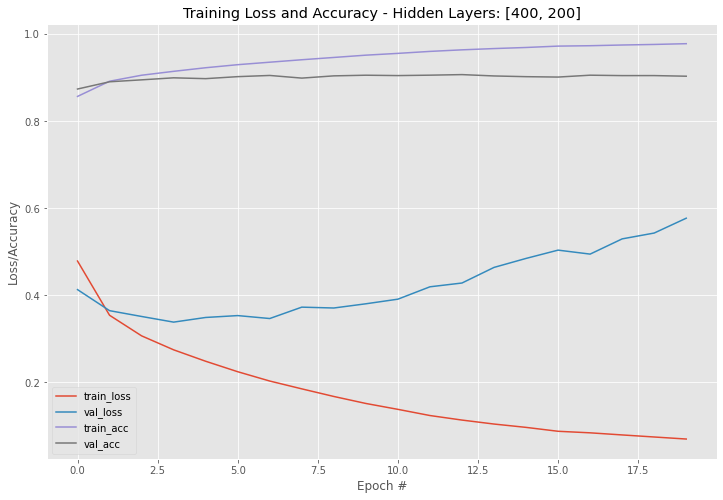

In [8]:
'''
Run the neural netork with two Dense layers followed by a Softmax layer
'''

hidden_layer_sizes=[400, 200]

model = get_model(hidden_layer_sizes=hidden_layer_sizes)
history = model.fit(trainX, trainY, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=VAL_SPLIT)
results = model.evaluate(testX, testY)

handle_results(results)
plot_loss(history, EPOCHS, hidden_layer_sizes)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 600)               471000    
_________________________________________________________________
dense_15 (Dense)             (None, 400)               240400    
_________________________________________________________________
dense_16 (Dense)             (None, 200)               80200     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                2010      
Total params: 793,610
Trainable params: 793,610
Non-trainable params: 0
_________________________________________________________________

Epoch 1/20
704/704 [==============================] - 3s 4ms/step - loss: 0.4598 - accuracy: 0.8597 - val_loss: 0.3853 - val_accuracy: 0.8826
Epoch 2/20
704/704 [==============================] - 2s 3ms/step - loss: 0.3398 - accuracy: 0.8944 - v

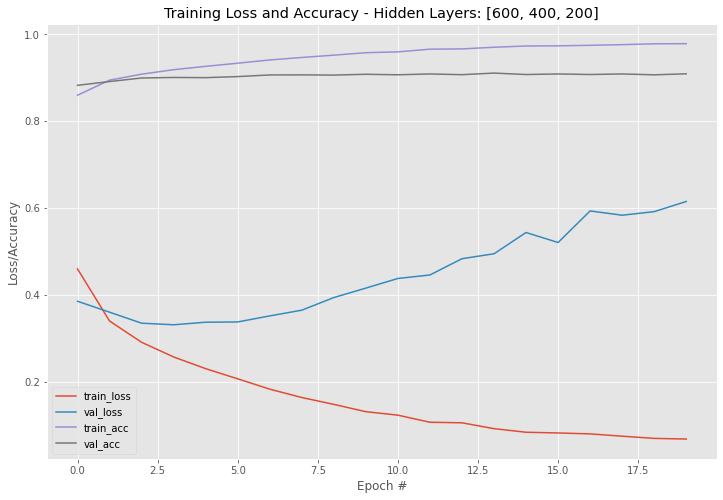

In [11]:
'''
Run the neural netork with three Dense layers followed by a Softmax layer
'''

hidden_layer_sizes=[600, 400, 200]

model = get_model(hidden_layer_sizes=hidden_layer_sizes)
history = model.fit(trainX, trainY, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=VAL_SPLIT)
results = model.evaluate(testX, testY)

handle_results(results)
plot_loss(history, EPOCHS, hidden_layer_sizes)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 800)               628000    
_________________________________________________________________
dense_19 (Dense)             (None, 600)               480600    
_________________________________________________________________
dense_20 (Dense)             (None, 400)               240400    
_________________________________________________________________
dense_21 (Dense)             (None, 200)               80200     
_________________________________________________________________
dense_22 (Dense)             (None, 10)                2010      
Total params: 1,431,210
Trainable params: 1,431,210
Non-trainable params: 0
_________________________________________________________________

Epoch 1/20
704/704 [==============================] - 3s 4ms/step - loss: 0.4558 - accuracy: 0.8602 - val_los

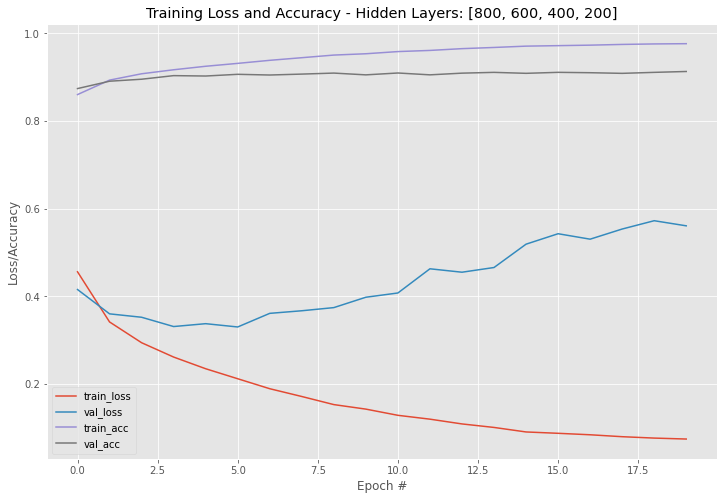

In [12]:
'''
Run the neural netork with four Dense layers followed by a Softmax layer
'''

hidden_layer_sizes=[800, 600, 400, 200]

model = get_model(hidden_layer_sizes=hidden_layer_sizes)
history = model.fit(trainX, trainY, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=VAL_SPLIT)
results = model.evaluate(testX, testY)

handle_results(results)
plot_loss(history, EPOCHS, hidden_layer_sizes)

In [ ]:
#
# Sometimes running all above experiments in sequences results in OOM (out of memory) condition in Google Colab.
# In this case generating the below diagram fails.
# This can be fixed by manually correcting result_data['params'] to the expected values.
#

# result_data['params'] = [7850, 159010, 396210, 793610, 1431210]

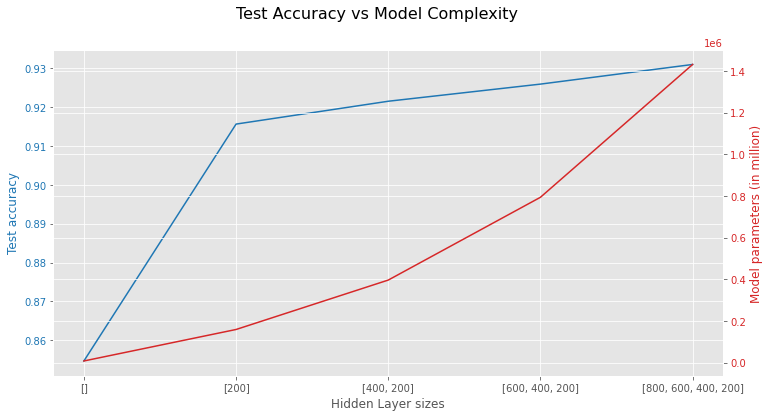

In [17]:
fig, ax1 = plt.subplots(figsize=(12,6))
fig.suptitle('Test Accuracy vs Model Complexity', fontsize=16)

t = np.arange(0, 5)

color = 'tab:blue'
ax1.set_xlabel('Hidden Layer sizes')
ax1.set_ylabel('Test accuracy', color=color)  # we already handled the x-label with ax1
ax1.plot(t, result_data['test_acc'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Model parameters (in million)', color=color)
ax2.plot(t, result_data['params'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.xticks(t, ('[]', '[200]', '[400, 200]', '[600, 400, 200]', '[800, 600, 400, 200]'))
plt.show()

## (ii)

In this section Dropout regularization will be applied to the 2 largest network configurations from (i)

*   L1 600 + L2 400 + L3 200 + Softmax
*   L1 800 + L2 600 + L3 400 + L4 200 + Softmax


Three different Dropout rates will be used against each network: 

*   0.1
*   0.25
*   0.5




In [ ]:
# reset result_data
result_data = {
    'test_loss': [],
    'test_acc': [],
    'params': []
}

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 600)               471000    
_________________________________________________________________
dropout_3 (Dropout)          (None, 600)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 400)               240400    
_________________________________________________________________
dropout_4 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 200)               80200     
_________________________________________________________________
dropout_5 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

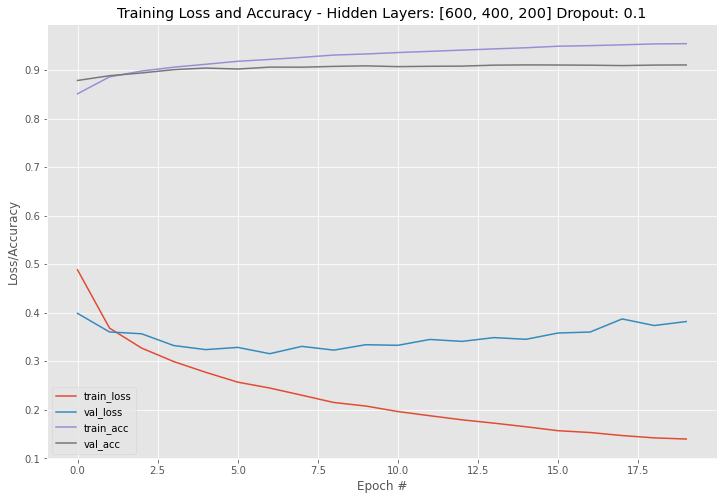

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 600)               471000    
_________________________________________________________________
dropout_6 (Dropout)          (None, 600)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 400)               240400    
_________________________________________________________________
dropout_7 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 200)               80200     
_________________________________________________________________
dropout_8 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

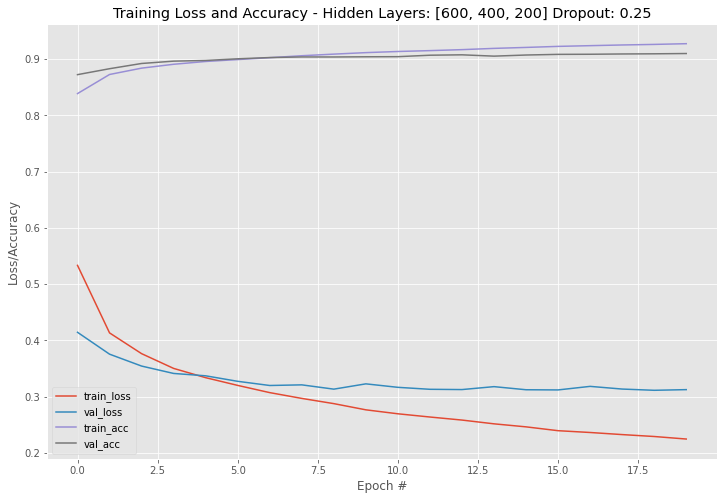

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 600)               471000    
_________________________________________________________________
dropout_9 (Dropout)          (None, 600)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 400)               240400    
_________________________________________________________________
dropout_10 (Dropout)         (None, 400)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 200)               80200     
_________________________________________________________________
dropout_11 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)               

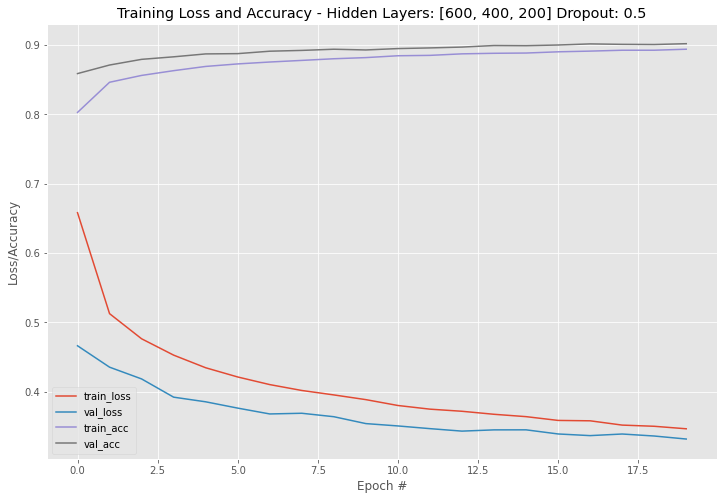

In [9]:
'''
Run the neural netork with three Dense layers followed by a Softmax layer
In addition Dropout will be used.
'''

hidden_layer_sizes=[600, 400, 200]
dropout = [0.1, 0.25, 0.5]

for d in dropout:
    model = get_model(hidden_layer_sizes=hidden_layer_sizes, dropout=d)
    history = model.fit(trainX, trainY, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=VAL_SPLIT)
    results = model.evaluate(testX, testY)

    handle_results(results)
    title = str(hidden_layer_sizes) + ' Dropout: ' + str(d)
    plot_loss(history, EPOCHS, title)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 800)               628000    
_________________________________________________________________
dropout_13 (Dropout)         (None, 800)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 600)               480600    
_________________________________________________________________
dropout_14 (Dropout)         (None, 600)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 400)               240400    
_________________________________________________________________
dropout_15 (Dropout)         (None, 400)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 200)             

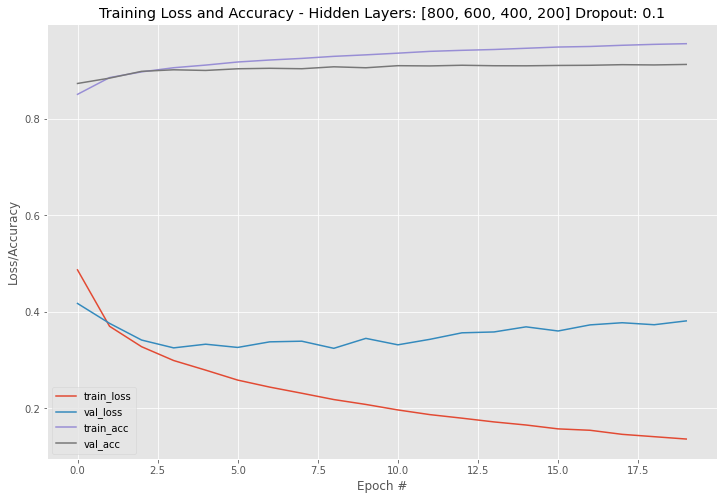

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 800)               628000    
_________________________________________________________________
dropout_17 (Dropout)         (None, 800)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 600)               480600    
_________________________________________________________________
dropout_18 (Dropout)         (None, 600)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 400)               240400    
_________________________________________________________________
dropout_19 (Dropout)         (None, 400)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 200)             

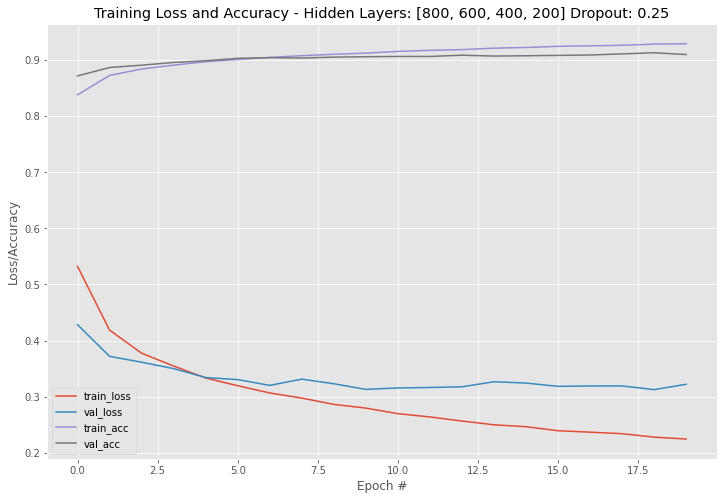

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 800)               628000    
_________________________________________________________________
dropout_21 (Dropout)         (None, 800)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 600)               480600    
_________________________________________________________________
dropout_22 (Dropout)         (None, 600)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 400)               240400    
_________________________________________________________________
dropout_23 (Dropout)         (None, 400)               0         
_________________________________________________________________
dense_53 (Dense)             (None, 200)             

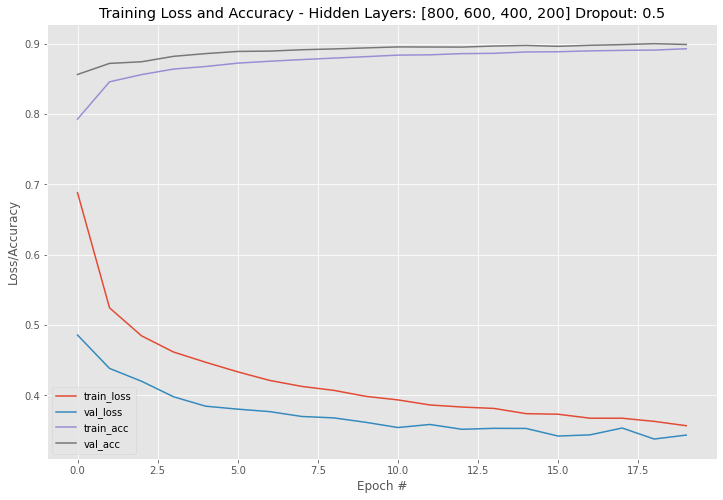

In [24]:
'''
Run the neural netork with four Dense layers followed by a Softmax layer
In addition Dropout will be used.
'''

hidden_layer_sizes=[800, 600, 400, 200]
dropout = [0.1, 0.25, 0.5]

for d in dropout:
    model = get_model(hidden_layer_sizes=hidden_layer_sizes, dropout=d)
    history = model.fit(trainX, trainY, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=VAL_SPLIT)
    results = model.evaluate(testX, testY)

    handle_results(results)
    title = str(hidden_layer_sizes) + ' Dropout: ' + str(d)
    plot_loss(history, EPOCHS, title)